In [4]:
import pandas as pd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
import statsmodels.api as sm


In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [6]:
file_url = 'https://raw.githubusercontent.com/SazzadSaran/HIT140-Project-objective-1/main/dataset2.csv'

# load CSV data into a pandas dattaframe
df_2 = pd.read_csv(file_url)

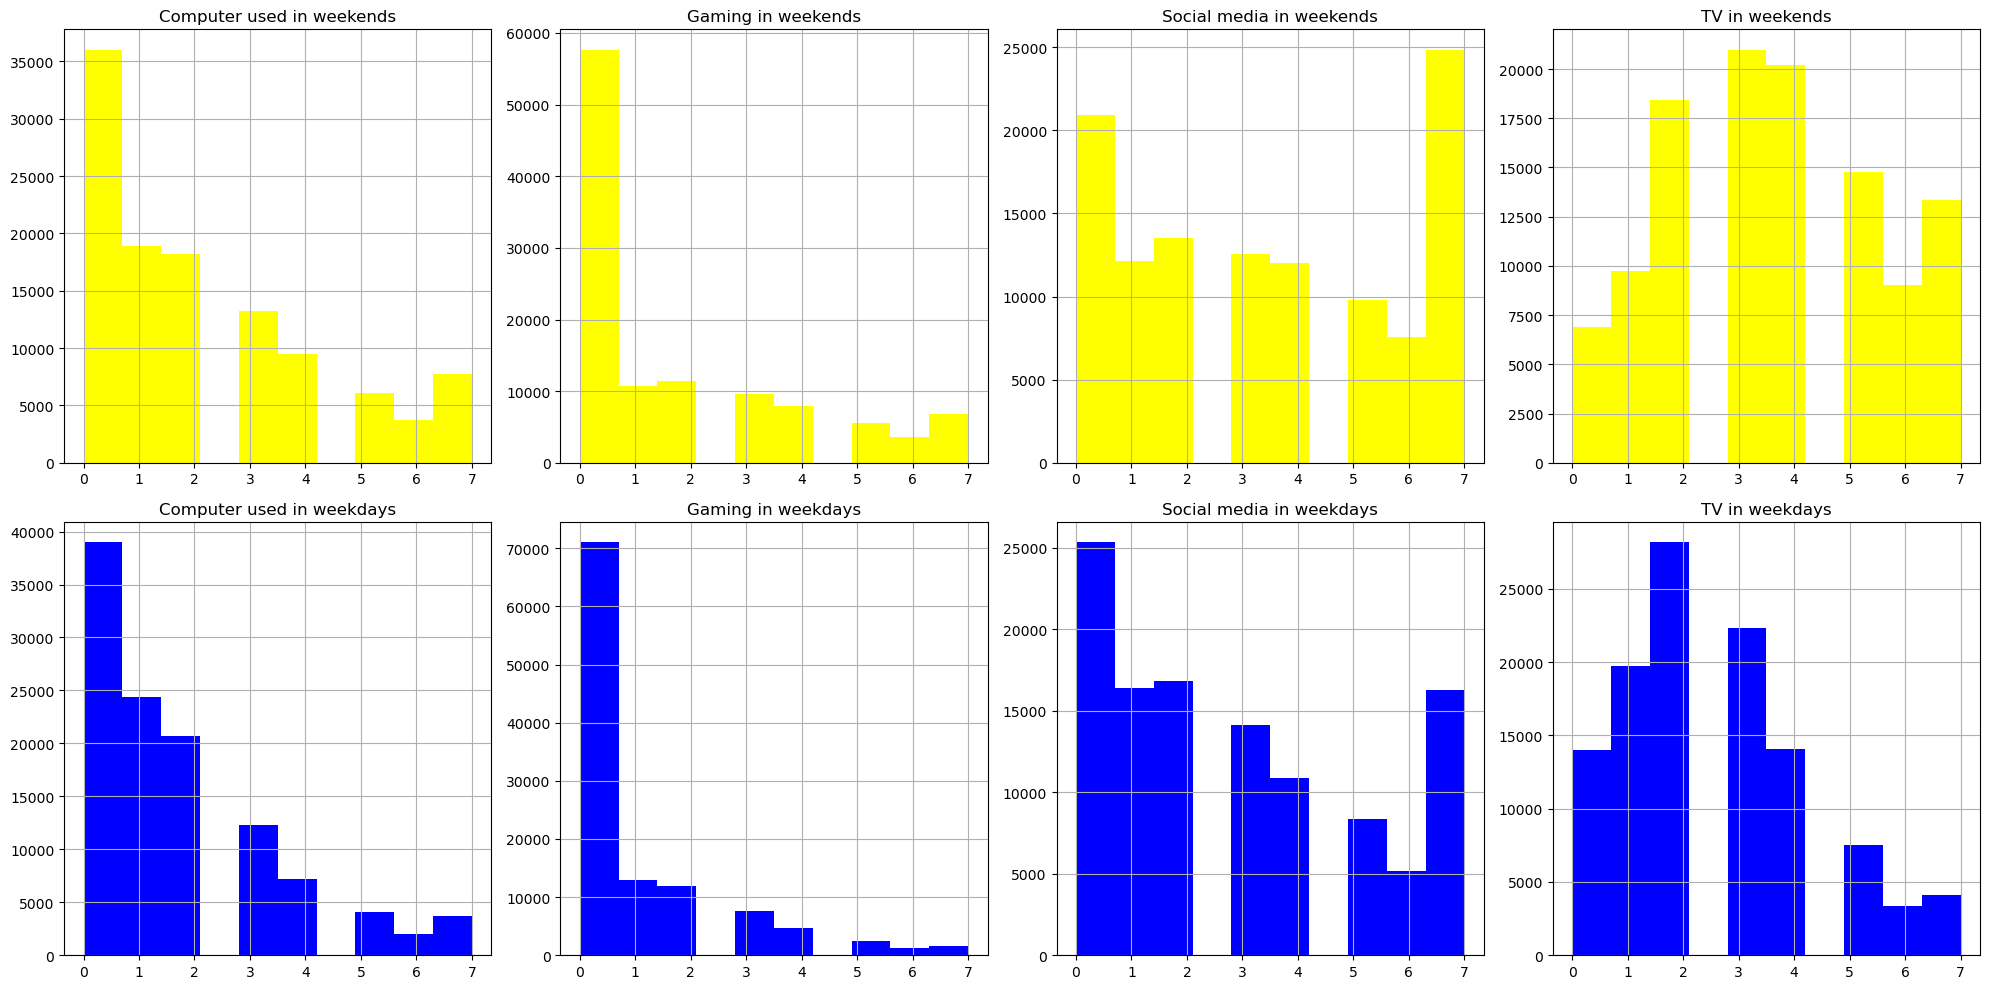

In [19]:


import matplotlib.pyplot as plt


weekend_cols = ['C_we', 'G_we', 'S_we', 'T_we']
weekday_cols = ['C_wk', 'G_wk', 'S_wk', 'T_wk']


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))


for i, col in enumerate(weekend_cols):
  row = 0
  col_idx = i
  df_2[col].hist(ax=axes[row, col_idx], color='yellow')
  if col == 'C_we':
    axes[row, col_idx].set_title("Computer used in weekends")
  elif col == 'G_we':
    axes[row, col_idx].set_title("Gaming in weekends")
  elif col == 'S_we':
    axes[row, col_idx].set_title("Social media in weekends")
  elif col == 'T_we':
    axes[row, col_idx].set_title("TV in weekends")
  elif col == 'C_wk':
    axes[row, col_idx].set_title("Computer used in weekdays")
  elif col == 'G_wk':
    axes[row, col_idx].set_title("Gaming in weekdays")
  elif col == 'S_wk':
    axes[row, col_idx].set_title("Social media in weekdays")
  elif col == 'T_wk':
    axes[row, col_idx].set_title("TV in weekdays")


for i, col in enumerate(weekday_cols):
  row = 1
  col_idx = i
  df_2[col].hist(ax=axes[row, col_idx], color='blue')
  if col == 'C_wk':
    axes[row, col_idx].set_title("Computer used in weekdays")
  elif col == 'G_wk':
    axes[row, col_idx].set_title("Gaming in weekdays")
  elif col == 'S_wk':
    axes[row, col_idx].set_title("Social media in weekdays")
  elif col == 'T_wk':
    axes[row, col_idx].set_title("TV in weekdays")

plt.tight_layout()
plt.show()


In [15]:
# prompt: create mean median mode max min and show the results in a table format

import pandas as pd

# Calculate the statistics
stats = df_2.agg(['mean', 'median', 'max', 'min'])

# Transpose the table for better readability
stats = stats.T

# Display the table
print(stats)


              mean     median        max        min
ID    1.060016e+06  1059952.0  1120115.0  1000002.0
C_we  2.188887e+00        2.0        7.0        0.0
C_wk  1.768854e+00        1.0        7.0        0.0
G_we  1.739130e+00        0.5        7.0        0.0
G_wk  1.013082e+00        0.0        7.0        0.0
S_we  3.517004e+00        3.0        7.0        0.0
S_wk  2.910656e+00        2.0        7.0        0.0
T_we  3.650932e+00        4.0        7.0        0.0
T_wk  2.567688e+00        2.0        7.0        0.0


In [16]:


import math


successes = len(df_2[df_2['G_we'] > 0])


total_observations = len(df_2)


sample_proportion = successes / total_observations


standard_error = math.sqrt((sample_proportion * (1 - sample_proportion)) / total_observations)


z_score = 1.96
margin_of_error = z_score * standard_error


ci_prop_lower = sample_proportion - margin_of_error
ci_prop_upper = sample_proportion + margin_of_error


mean_loved = df_2['G_we'].mean()


standard_error_mean = df_2['G_we'].std() / math.sqrt(total_observations)


margin_of_error_mean = z_score * standard_error_mean


ci_mean_lower = mean_loved - margin_of_error_mean
ci_mean_upper = mean_loved + margin_of_error_mean

print(f"CI Mean for G_we: [{ci_mean_lower:.4f}, {ci_mean_upper:.4f}]")
print(f"CI Prop for G_we (where > 0 is success): [{ci_prop_lower:.4f}, {ci_prop_upper:.4f}]")


CI Mean for G_we: [1.7265, 1.7518]
CI Prop for G_we (where > 0 is success): [0.5907, 0.5964]


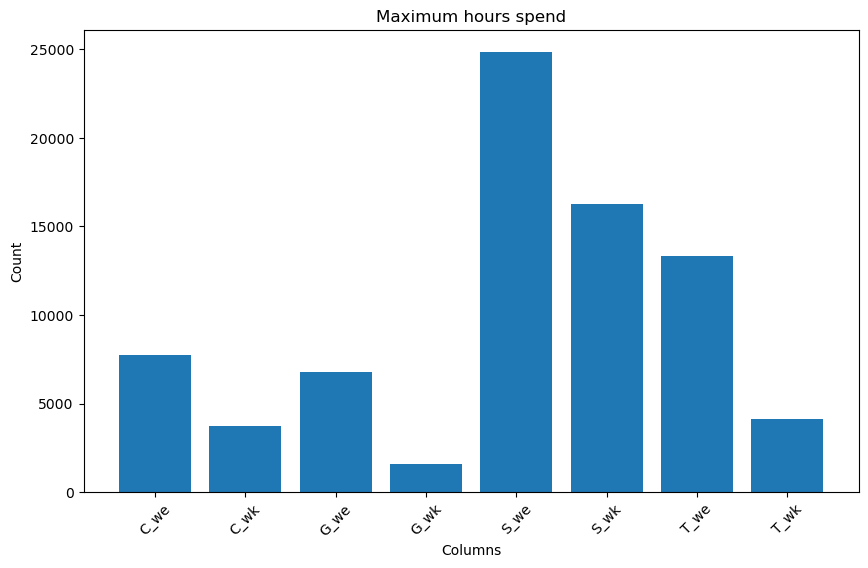

In [12]:



df_filtered = df_2[df_2[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].apply(lambda row: any(row == 7), axis=1)]


counts = df_filtered[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].apply(lambda col: (col == 7).sum())


plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xlabel("Columns")
plt.ylabel("Count")
plt.title("Maximum hours spend")
plt.xticks(rotation=45)
plt.show()


In [18]:


from scipy import stats


t_stat, p_value = stats.ttest_ind(df_2['T_we'], df_2['G_we'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 220.5190
P-value: 0.0000
